In [46]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of loans
num_loans = 10000

# Generate random loan data
loan_data = {
    "Loan_ID": [f"L{str(i).zfill(3)}" for i in range(1, num_loans + 1)],
    "Loan_Amount": np.random.randint(5000, 50000, num_loans),
    "Loan_Term": np.random.choice([12, 24, 36, 48, 60], num_loans),
    "Interest_Rate": np.round(np.random.uniform(3.0, 15.0, num_loans), 2),
    "Age": np.random.randint(21, 65, num_loans),
    "Income": np.random.randint(2000, 15000, num_loans),
    "Credit_Score": np.random.randint(300, 850, num_loans)
}

# Convert to DataFrame
df = pd.DataFrame(loan_data)

# Ensure higher incomes tend to get higher loans
df["Loan_Amount"] = (df["Income"] * np.random.uniform(2.5, 3.5)).clip(5000, 50000)

# Lower credit scores should have higher interest rates
df["Interest_Rate"] = np.clip(
    np.round(3 + (850 - df["Credit_Score"]) / 80 + np.random.uniform(-1, 1, len(df)), 2),
    3.0, 15.0  # Keep within realistic range
)

# Assign loan status based on financial risk factors
def assign_loan_status(row):
    """Assigns a loan status based on financial risk factors."""
    if row["Credit_Score"] > 700 and row["Income"] > 5000 and row["Interest_Rate"] < 7:
        return 1  # Loan Paid
    elif row["Credit_Score"] < 550 or row["Income"] < 3000 or row["Interest_Rate"] > 12:
        return 0  # Default
    else:
        return np.random.choice([0, 1], p=[0.3, 0.7])  # Some randomness for middle cases

df["Loan_Status"] = df.apply(assign_loan_status, axis=1)

# Save to CSV
df.to_csv("loan_dataset.csv", index=False)

# Display the first few rows
print("Generated Loan Dataset:")
print(df.head())


Generated Loan Dataset:
  Loan_ID   Loan_Amount  Loan_Term  Interest_Rate  Age  Income  Credit_Score  \
0    L001  25190.459403         36           8.56   40    7809           467   
1    L002  24558.197905         48           3.00   22    7613           808   
2    L003  33732.441283         12           3.93   42   10457           810   
3    L004  35851.807633         60           7.63   41   11114           545   
4    L005  39558.279378         36           6.33   26   12263           523   

   Loan_Status  
0            0  
1            1  
2            1  
3            0  
4            0  


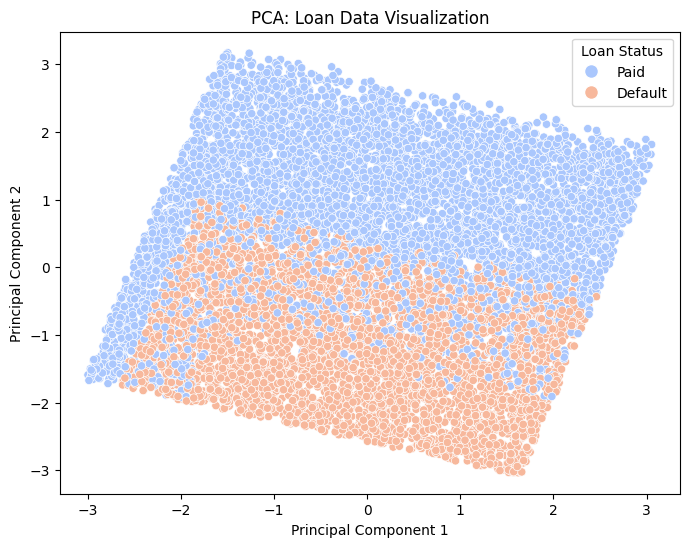

Explained Variance Ratio (PCA): [0.33403166 0.32602652]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("loan_dataset.csv")

features = ["Loan_Amount", "Loan_Term", "Interest_Rate", "Age", "Income", "Credit_Score"]

# Standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# PCA (Principal Component Analysis)

pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Loan_Status"] = df["Loan_Status"]  # Add Loan_Status for visualization

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue=df_pca["Loan_Status"], palette="coolwarm", data=df_pca)
plt.title("PCA: Loan Data Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=legend_handles, title="Loan Status")

plt.show()


# Print explained variance (importance of each component)
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)


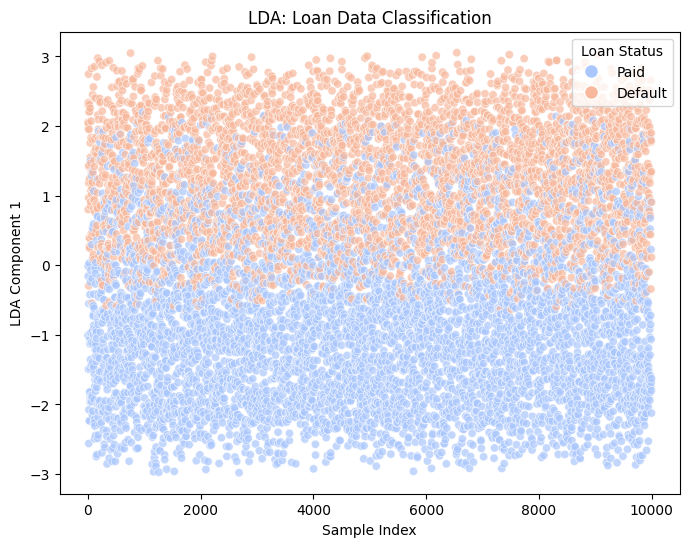

LDA Coefficients: [[0.33315184 0.02122195 0.03163789 0.02378288 0.33315184 3.11601079]]


In [ ]:
# LDA (Linear Discriminant Analysis)

lda = LDA(n_components=1)  # Reduce to 1 component since we have 2 classes (Loan Paid/Default)
X_lda = lda.fit_transform(X_scaled, df["Loan_Status"])

# DataFrame with LDA results
df_lda = pd.DataFrame(X_lda, columns=["LDA1"])
df_lda["Loan_Status"] = df["Loan_Status"]

#Plot the LDA scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=X_lda.flatten(), hue=df["Loan_Status"], palette="coolwarm", alpha=0.7)

# Title and labels
plt.title("LDA: Loan Data Classification")
plt.xlabel("Sample Index")
plt.ylabel("LDA Component 1")

# Colors from the "coolwarm" palette
palette = sns.color_palette("coolwarm", n_colors=2)  # Extract 2 colors for "Paid" and "Default"

# Create custom handles with the colors from the palette
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[0], markersize=10, label="Paid"),   # Color for Paid
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[1], markersize=10, label="Default")  # Color for Default
]
# Add the custom legend with correct colors
plt.legend(handles=legend_handles, title="Loan Status")

# Show plot
plt.show()

print("LDA Coefficients:", lda.coef_)  
